# SADA dataset


Arabic dialect classification remains a challenging problem in NLP due to the language's diglossic nature  and the vast linguistic variations across regions, cities, and countries. Traditional datasets for Arabic NLP often rely on text from online exchanges, such as emails and social media posts, which may not fully capture the nuances of spoken dialects. However, the introduction of SADA, a dataset sourced from TV show dialogues and provided by the Saudi Broadcasting Authority in collaboration with SDAIA, presents new opportunities for dialect analysis.


A unique feature of SADA is its division into different domains, such as comedy and drama, which allows for a deeper understanding of how dialect is used in various contexts. This project aims to explore the performance of different classification models in out-of-domain dialect classification. Specifically, we seek to determine whether these models can generalize across different text domains by capturing dialectal patterns effectively or if their performance is restricted to the domains they are trained on. This analysis will provide valuable insights into the robustness of dialect classification models and their ability to handle real-world linguistic diversity.

__[The link to the dataset.](https://www.kaggle.com/datasets/sdaiancai/sada2022)__




# Exploring the data

The dataset is sourced from SDAIA (Saudi Data & Artificial Intelligence Authority), the following code shows that the dataset consists of 253,166 rows and 15 columns. It contains transcribed Arabic speech segments from various media genres, aiming to predict the speaker's dialect based on training data from different categories. The dataset includes metadata such as FileName, ShowName, FullFileLength, SegmentID, SegmentLength, SegmentStart, SegmentEnd, SpeakerAge, SpeakerGender, SpeakerDialect, Speaker, Environment, GroundTruthText, ProcessedText, and Category.





### Load The Dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = "original data\sada_dataset.csv"
df = pd.read_csv(file_path)

# Display column names
print("Columns in the dataset:")
print(df.columns)

# Display the first 10 rows
print("\nFirst 10 rows of the dataset:")
print(df.head(10))

Columns in the dataset:
Index(['Unnamed: 0', 'FileName', 'ShowName', 'FullFileLength', 'SegmentID',
       'SegmentLength', 'SegmentStart', 'SegmentEnd', 'SpeakerAge',
       'SpeakerGender', 'SpeakerDialect', 'Speaker', 'Environment',
       'GroundTruthText', 'ProcessedText', 'Category'],
      dtype='object')

First 10 rows of the dataset:
   Unnamed: 0                  FileName           ShowName  FullFileLength  \
0           0  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
1           1  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
2           2  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
3           3  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
4           4  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
5           5  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
6           6  batch_1/6k_SBA_100_0.wav  الجفاف يقتل الندى           605.3   
7           7  batch_1/6k_SBA_1

### More About The Dataset

In [ ]:

# Remove the first index column if it exists (assuming it's unnamed and redundant)
if df.columns[0].startswith("Unnamed"):
    df = df.iloc[:, 1:]

# Count number of rows and columns
num_rows, num_cols = df.shape

# Get column names
column_names = df.columns.tolist()

# Count occurrences of each category
category_counts = df["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "Count"]

# Count occurrences of each dialect
dialect_counts = df["SpeakerDialect"].value_counts().reset_index()
dialect_counts.columns = ["Dialect", "Count"]

# Print results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"Column names: {column_names}")

print("\nCategory Counts:")
print(category_counts)

print("\nDialect Counts:")
print(dialect_counts)

Number of rows: 253166
Number of columns: 15
Column names: ['FileName', 'ShowName', 'FullFileLength', 'SegmentID', 'SegmentLength', 'SegmentStart', 'SegmentEnd', 'SpeakerAge', 'SpeakerGender', 'SpeakerDialect', 'Speaker', 'Environment', 'GroundTruthText', 'ProcessedText', 'Category']

Category Counts:
        Category  Count
0         كوميدي  71782
1          درامي  52843
2          اطفال  42400
3        مسابقات  39932
4            طبخ  31847
5         تاريخي   5721
6        اجتماعي   3558
7         وثائقي   2262
8   توعوي ارشادي   1635
9          سياحي    871
10        ترفيهي    315

Dialect Counts:
                              Dialect  Count
0                               Najdi  94611
1   More than 1 speaker اكثر من متحدث  52501
2                              Hijazi  36170
3                             Unknown  30867
4                             Khaliji  30320
5                ModernStandardArabic   4302
6                            Egyptian   2172
7                           Leva

### Lets do some visualizations!

For better understand of the structure and distribution of the SADA dataset, we performed a series of visualizations. These visualizations help us explore key aspects of the data, such as dialect distribution and category types. By visualizing the data, we aim to uncover potential patterns, detect any imbalances, and gain insights that can guide the preprocessing and modeling stages.

Category                           اجتماعي  اطفال  تاريخي  ترفيهي  \
SpeakerDialect                                                      
Egyptian                                38    102       0       2   
Hijazi                                 696  17724      74     206   
Iraqi                                    0      0       0       0   
Janubi                                   0      3       0       0   
Khaliji                                 82   1676    1534       0   
Levantine                                4      5       0       0   
Maghrebi                                 9      0       0       0   
ModernStandardArabic                   207   1493       2       0   
More than 1 speaker اكثر من متحدث      770  12186    1051      52   
Najdi                                 1610   3232    2260      53   
Notapplicable                            0      9       2       0   
Shamali                                  0     29       0       0   
Unknown                           

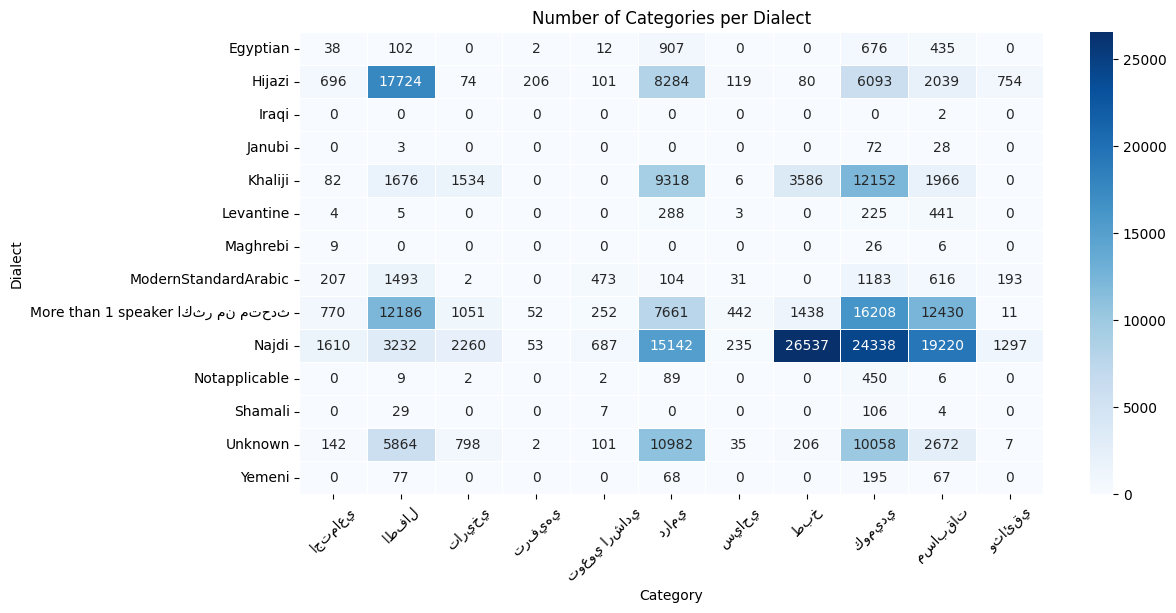

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a pivot table to count occurrences of each category per dialect
dialect_category_matrix = df.pivot_table(index="SpeakerDialect", columns="Category", aggfunc="size", fill_value=0)

# Print the matrix
print(dialect_category_matrix)

# Visualize the data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dialect_category_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Category")
plt.ylabel("Dialect")
plt.title("Number of Categories per Dialect")
plt.xticks(rotation=45)
plt.show()


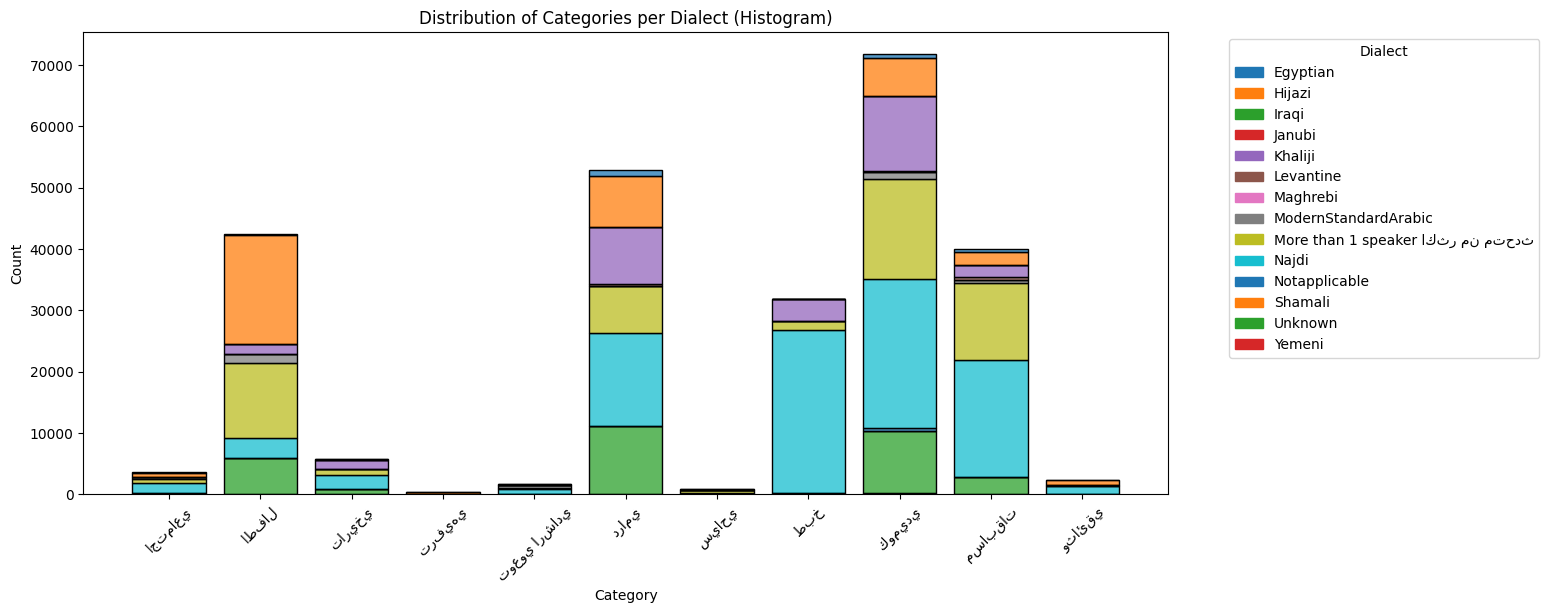

In [ ]:
# Create a pivot table to count occurrences of each category per dialect
dialect_category_matrix = df.pivot_table(index="SpeakerDialect", columns="Category", aggfunc="size", fill_value=0)

# Convert the matrix into a long-form DataFrame for histogram plotting
matrix_long = dialect_category_matrix.reset_index().melt(id_vars="SpeakerDialect", var_name="Category", value_name="Count")

# Define a distinct color palette for all dialects
unique_dialects = matrix_long["SpeakerDialect"].unique().tolist()  # Convert to Python list
palette_dict = dict(zip(unique_dialects, sns.color_palette("tab10", len(unique_dialects))))

# Plot a stacked histogram with an explicit legend
plt.figure(figsize=(14, 6))
ax = sns.histplot(data=matrix_long, x="Category", hue="SpeakerDialect", weights="Count",
                  multiple="stack", shrink=0.8, bins=len(dialect_category_matrix.columns),
                  palette=palette_dict)

# Labels and title
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories per Dialect (Histogram)")
plt.xticks(rotation=45)

# Manually create a legend
handles = [plt.Rectangle((0,0),1,1, color=palette_dict[d]) for d in unique_dialects]
plt.legend(handles=handles, labels=[str(d) for d in unique_dialects], title="Dialect", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

both figures provide insight into how different genres are distributed across dialects. It shows that some dialects appear more frequently in specific categories, which may influence the training phase of the model

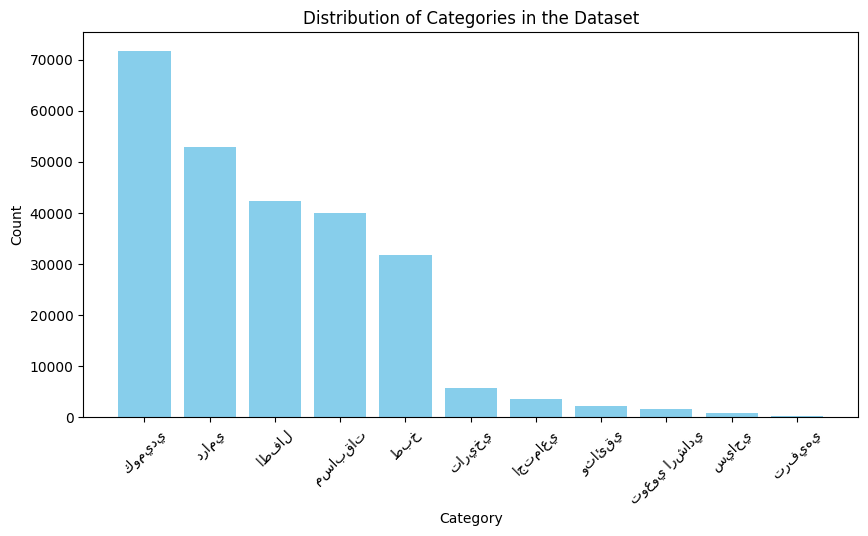

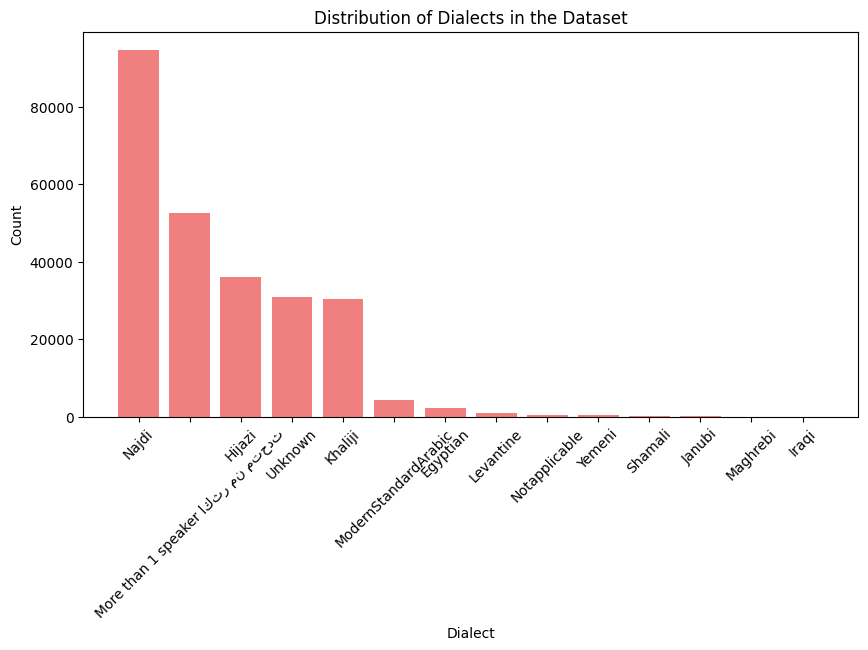

In [ ]:
dialect_counts = df["SpeakerDialect"].value_counts().reset_index()
dialect_counts.columns = ["Dialect", "Count"]

# Plot category distribution
plt.figure(figsize=(10, 5))
plt.bar(category_counts["Category"], category_counts["Count"], color='skyblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories in the Dataset")
plt.xticks(rotation=45)
plt.show()

# Plot dialect distribution
plt.figure(figsize=(10, 5))
plt.bar(dialect_counts["Dialect"], dialect_counts["Count"], color='lightcoral')
plt.xlabel("Dialect")
plt.ylabel("Count")
plt.title("Distribution of Dialects in the Dataset")
plt.xticks(rotation=45)
plt.show()


The dialect distribution indicates that Najdi (94,611 rows) is the most frequent dialect, followed by multi-speaker recordings (52,501 rows), Hijazi (36,170 rows), and Khaliji (30,320 rows). Other dialects such as Modern Standard Arabic, Egyptian, Levantine, Yemeni, and Maghrebi appear in much smaller proportions. The category distribution (in Figure 2) highlights that the dataset is dominated by Comedy (71,782 rows), Drama (52,843 rows), and Children’s content (42,400 rows), while some categories, like Tourism (871 rows) and Entertainment (315 rows), are underrepresented.

# Splitting and balancing the data

mention what colomns we are interested in and mention the dialects and catogreies used and why

In [ ]:
df.sample(n=3)

,Unnamed: 0,FileName,ShowName,FullFileLength,SegmentID,SegmentLength,SegmentStart,SegmentEnd,SpeakerAge,SpeakerGender,SpeakerDialect,Speaker,Environment,GroundTruthText,ProcessedText,Category
187300,87747,batch_2/6k_v_SBA3_2630_0.wav,مهن,632.43,6k_v_SBA3_2630_0-seg_210_650-240_480,29.83,210.65,240.48,Adult -- بالغ,Male,Najdi,Speaker1متحدث,Music -- موسيقى,وبدينا في الفين وخمستاشر آه بداية من خدمات متن...,وبدينا في الفين وخمستاشر اه بداية من خدمات متن...,وثائقي
56650,212561,batch_4/6k_v_SBA_584_1.wav,طاش ما طاش,603.90,6k_v_SBA_584_1-seg_190_010-212_260,22.25,190.01,212.26,Unknown,Unknown,Unknown,Music موسيقى,Music -- موسيقى,اخويا. اخويا. اخويا اخويا الصغير، أخويا أخويا ...,اخويا اخويا اخويا اخويا الصغير اخويا اخويا اخو...,كوميدي
159125,199149,batch_4/6k_v_SBA_363_2.wav,حكايات بابا فرحان,603.45,6k_v_SBA_363_2-seg_599_620-603_450,3.83,599.62,603.45,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,More than 1 speaker اكثر من متحدث,Noisy -- ضوضاء,فين أم الخير أم الخير؟ أهي أم الخير,فين ام الخير ام الخير اهي ام الخير,اطفال


### Remove unnecessary features

In [ ]:
# remove unnecessary features
df = df[['Category', 'ProcessedText', 'SpeakerDialect']]


# keep the needed dialects and categories
categories = ['درامي', 'اطفال', 'كوميدي']
dialects = ['Najdi', 'Hijazi', 'Khaliji']

df = df[df.SpeakerDialect.isin(dialects)]
df = df[df.Category.isin(categories)]


In [ ]:
df.sample(n=3)

,Category,ProcessedText,SpeakerDialect
235615,درامي,بدل ما انت كده جالس تتفرج عليه ما تيجي تساعدني...,Hijazi
134991,كوميدي,سلمات يا عتيق,Khaliji
144900,درامي,مع السلامة,Hijazi


We are specifically interested in classifying three dialects—Najdi, Hijazi, and Khaliji—and evaluating the model across three distinct content categories: Drama, Kids, and Comedy. This setup allows us to perform multi-domain testing. Therefore, we will retain only the Category and ProcessedText columns as independent features, and use SpeakerDialect as the target (dependent) variable.

### Data Balancing


Category        اطفال  درامي  كوميدي
SpeakerDialect                      
Hijazi          17724   8284    6093
Khaliji          1676   9318   12152
Najdi            3232  15142   24338


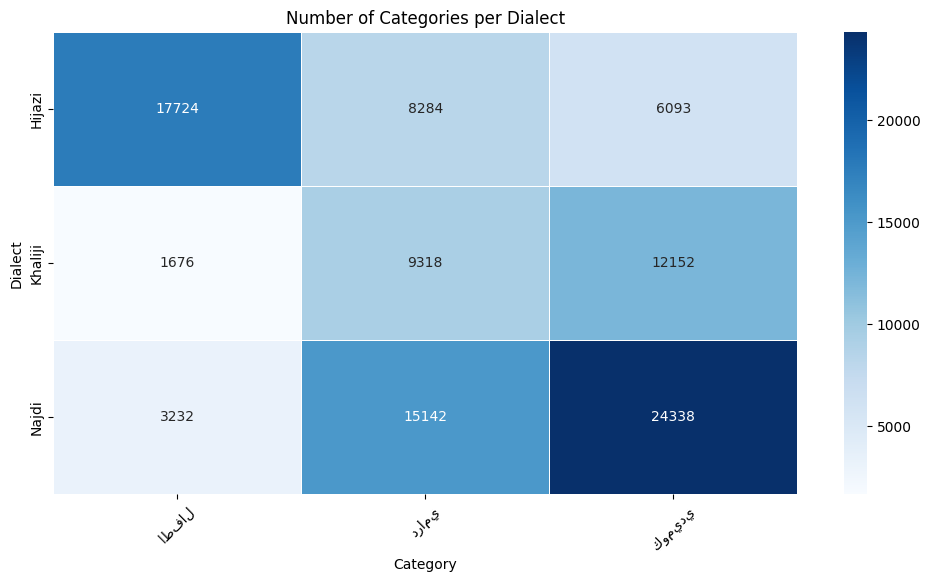

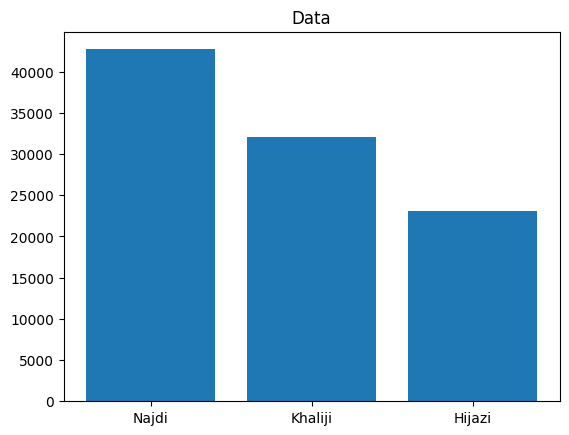

['Najdi' 'Khaliji' 'Hijazi']
[42712 32101 23146]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a pivot table to count occurrences of each category per dialect
dialect_category_matrix = df.pivot_table(index="SpeakerDialect", columns="Category", aggfunc="size", fill_value=0)

# Print the matrix
print(dialect_category_matrix)

# Visualize the data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dialect_category_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Category")
plt.ylabel("Dialect")
plt.title("Number of Categories per Dialect")
plt.xticks(rotation=45)
plt.show()

# bar chartt for dialect distribution
y = np.array(df.SpeakerDialect.value_counts())
x = np.array(df.SpeakerDialect.unique())


plt.bar(x, y)
plt.title('Data')
plt.show()

print(x)
print(y)

The heatmap and bar chart clearly reveals a significant imbalance in the distribution of dialects across the dataset. This imbalance can negatively impact model performance and introduce potential bias.

To address this, our goal is to create a balanced dataset by ensuring an equal number of samples for each dialect within every category. Since we are conducting cross-domain evaluations training models on one category and testing on others it’s crucial that each training set across categories is equally representative.

Notably, the 'Khaliji' dialect in the 'أطفال' (Kids) category has the fewest samples (1,676). To maintain consistency and fairness across our experiments, we will standardize the number of samples to 1,676 per dialect per category.


In [ ]:
df_drama = df[df['Category'] == 'درامي']
df_comedy = df[df['Category'] == 'كوميدي']
df_kids = df[df['Category'] == 'اطفال']

In [ ]:
# Define the target number of samples for each dialect
target_samples = {
    'Najdi': 1676,
    'Hijazi': 1676,
    'Khaliji': 1676,
}

# ------------------------------ Kid --------------------------------
# Downsample each dialect
balanced_data_kid = pd.concat([
    group.sample(n=min(len(group), target_samples.get(dialect, len(group))), random_state=42)
    for dialect, group in df_kids.groupby('SpeakerDialect')
])
# Shuffle the final dataset
balanced_data_kid = balanced_data_kid.sample(frac=1, random_state=42).reset_index(drop=True)
# Check new distribution
print('################## balanced_data_kid ##################')
print(balanced_data_kid['SpeakerDialect'].value_counts())

# ------------------------------ Drama --------------------------------
# Downsample each dialect
balanced_data_drama = pd.concat([
    group.sample(n=min(len(group), target_samples.get(dialect, len(group))), random_state=42)
    for dialect, group in df_drama.groupby('SpeakerDialect')
])
# Shuffle the final dataset
balanced_data_drama = balanced_data_drama.sample(frac=1, random_state=42).reset_index(drop=True)
# Check new distribution
print('################## balanced_data_drama ##################')
print(balanced_data_drama['SpeakerDialect'].value_counts())

# ------------------------------ Comedy --------------------------------
# Downsample each dialect
balanced_data_comedy = pd.concat([
    group.sample(n=min(len(group), target_samples.get(dialect, len(group))), random_state=42)
    for dialect, group in df_comedy.groupby('SpeakerDialect')
])
# Shuffle the final dataset
balanced_data_comedy = balanced_data_comedy.sample(frac=1, random_state=42).reset_index(drop=True)
# Check new distribution
print('################## balanced_data_comedy ##################')
print(balanced_data_comedy['SpeakerDialect'].value_counts())


################## balanced_data_kid ##################
SpeakerDialect
Khaliji    1676
Hijazi     1676
Najdi      1676
Name: count, dtype: int64
################## balanced_data_drama ##################
SpeakerDialect
Khaliji    1676
Hijazi     1676
Najdi      1676
Name: count, dtype: int64
################## balanced_data_comedy ##################
SpeakerDialect
Khaliji    1676
Hijazi     1676
Najdi      1676
Name: count, dtype: int64


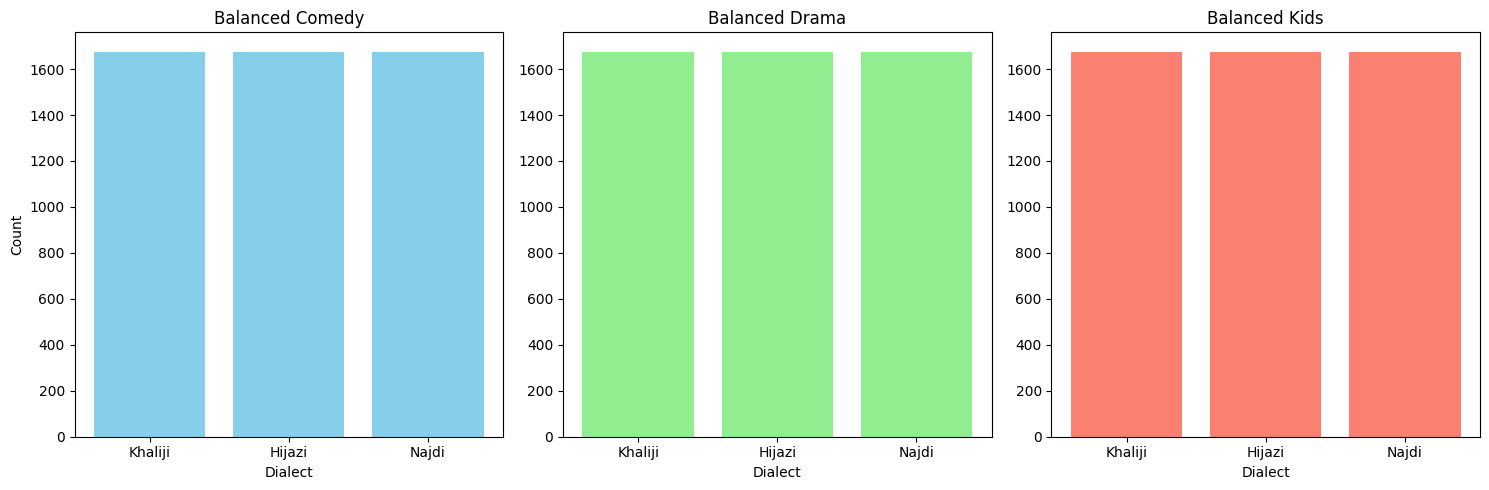

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
y_comedy = balanced_data_comedy['SpeakerDialect'].value_counts()
x_comedy = y_comedy.index

y_drama = balanced_data_drama['SpeakerDialect'].value_counts()
x_drama = y_drama.index

y_kid = balanced_data_kid['SpeakerDialect'].value_counts()
x_kid = y_kid.index

# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Comedy subplot
axs[0].bar(x_comedy, y_comedy, color='skyblue')
axs[0].set_title('Balanced Comedy')
axs[0].set_xlabel('Dialect')
axs[0].set_ylabel('Count')

# Drama subplot
axs[1].bar(x_drama, y_drama, color='lightgreen')
axs[1].set_title('Balanced Drama')
axs[1].set_xlabel('Dialect')

# Kids subplot
axs[2].bar(x_kid, y_kid, color='salmon')
axs[2].set_title('Balanced Kids')
axs[2].set_xlabel('Dialect')

# Make layout neat
plt.tight_layout()
plt.show()


We'll start by combining the data for some initial modeling experiments. Later, we'll save the separately split datasets to perform cross-domain analysis and evaluate how well models generalize across different categories.

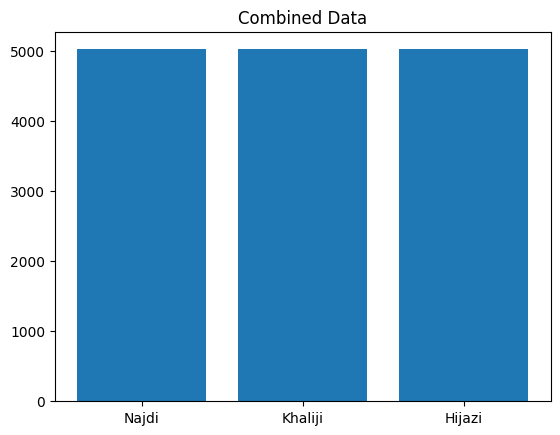

Category        اطفال  درامي  كوميدي
SpeakerDialect                      
Hijazi           1676   1676    1676
Khaliji          1676   1676    1676
Najdi            1676   1676    1676


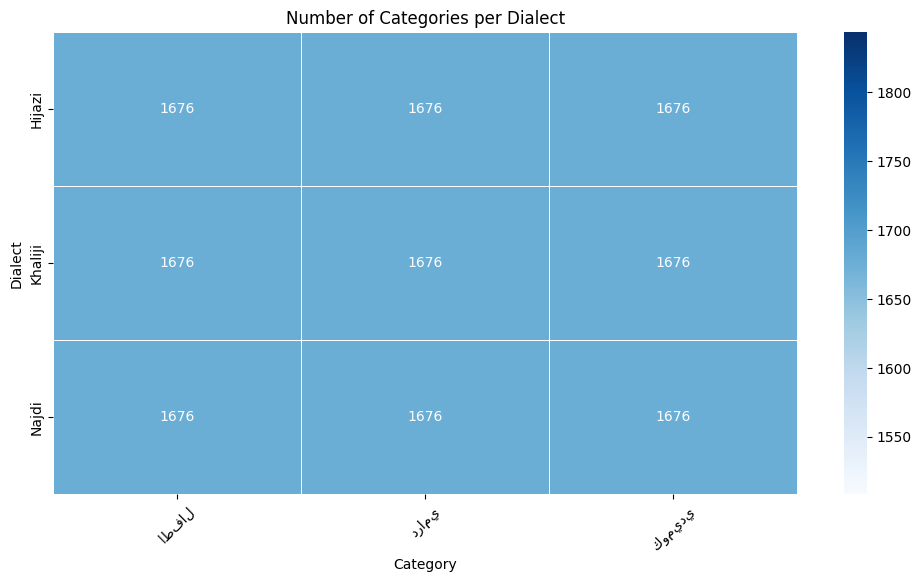

['Najdi' 'Khaliji' 'Hijazi']
[5028 5028 5028]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all three balanced subsets
combined_data = pd.concat([balanced_data_kid, balanced_data_drama, balanced_data_comedy], ignore_index=True)

# Shuffle the full dataset
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

y_combined_data = np.array(combined_data.SpeakerDialect.value_counts())
x_combined_data = np.array(combined_data.SpeakerDialect.unique())


plt.bar(x_combined_data, y_combined_data)
plt.title('Combined Data')
plt.show()



# Create a pivot table to count occurrences of each category per dialect
dialect_category_matrix = combined_data.pivot_table(index="SpeakerDialect", columns="Category", aggfunc="size", fill_value=0)

# Print the matrix
print(dialect_category_matrix)

# Visualize the data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dialect_category_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Category")
plt.ylabel("Dialect")
plt.title("Number of Categories per Dialect")
plt.xticks(rotation=45)
plt.show()


print(x_combined_data)
print(y_combined_data)

The above figures shows that our data is balanced 🥳.

We will save the files in csv format for future use.

In [ ]:
# Save cleaned data for future use
combined_data.to_csv('combine_data.csv', index=False)

# Save cleaned data for future use
balanced_data_kid.to_csv('balanced_data_kid.csv', index=False)

# Save cleaned data for future use
balanced_data_drama.to_csv('balanced_data_drama.csv', index=False)

# Save cleaned data for future use
balanced_data_comedy.to_csv('balanced_data_comedy.csv', index=False)

# Baseline Model - Trying logistic regression and some preprocessing

In this section, we start by building a baseline text classification model using Logistic Regression to predict the speaker’s dialect based on the transcribed text. At this stage, we use the entire dataset across all category types we are interested in to evaluate the overall performance and identify the necessary preprocessing steps for future models.

Next, we shift our focus to building a genre-specific model. For example, we train the model on data from a single genre (e.g., drama) to classify dialects (e.g., Khaliji). This allows the model to learn dialectal patterns within a consistent linguistic context. To assess the model’s generalization ability, we will test it on a different genre (e.g., comedy) and observe how well it performs on out-of-domain data. This approach helps us understand the model’s robustness and adaptability to variations across different media genres.

### Loadig the data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file
df = pd.read_csv('combined_data.csv')
print(df.head())
print(df.size)
# Split into 80% training and 20% testing, with shuffling
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

  Category                                      ProcessedText SpeakerDialect
0    درامي                                         بعيد ي عني          Najdi
1    اطفال                    نفس الشي هذا مستحيل مستحيل يحصل        Khaliji
2    درامي                           ارجوك اعتبر الموضوع عادي          Najdi
3    درامي      طبعا طبعا يا خالي بالتاكيد انا راح انبه عليهم        Khaliji
4    درامي  خلاص خلاص لا تزعل نفسك يوبا لا تزعل نفسك انا ا...        Khaliji
45252


### Now lets try our basline model
In this section, we explore two baseline text classification models built to predict the speaker’s dialect from transcribed Arabic speech segments. Both models are based on Logistic Regression, and their purpose is to serve as a reference point for evaluating more advanced models in future stages. Each model employs different feature engineering techniques and preprocessing steps, allowing us to assess their impact on overall performance.



Initial number of rows in training set: 12067
Initial number of rows in testing set: 3017
Number of rows after removing missing values in training set: 12064
Number of rows after removing missing values in testing set: 3016


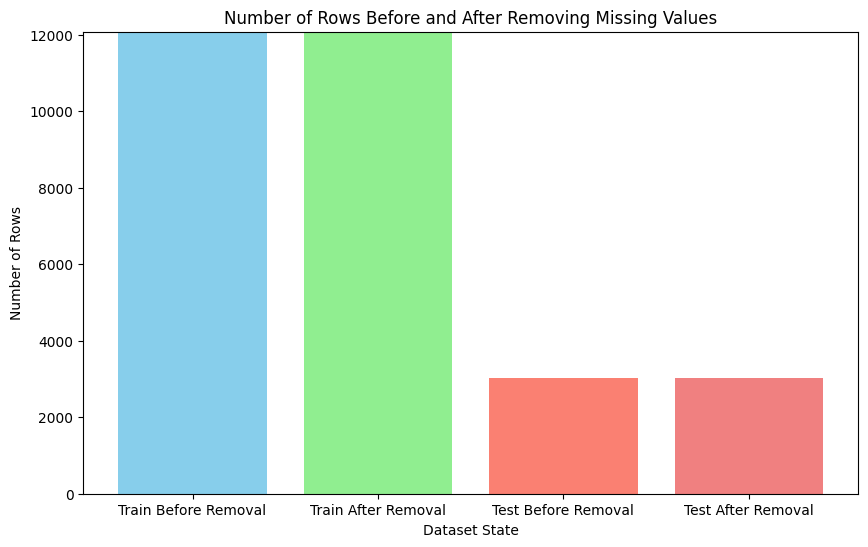

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Display initial number of rows
initial_train_count = len(train)
initial_test_count = len(test)
print(f"Initial number of rows in training set: {initial_train_count}")
print(f"Initial number of rows in testing set: {initial_test_count}")

# Remove rows with missing values in 'ProcessedText' or 'SpeakerDialect'
train_cleaned = train.dropna(subset=['ProcessedText', 'SpeakerDialect'])
test_cleaned = test.dropna(subset=['ProcessedText', 'SpeakerDialect'])

# Display number of rows after removal
final_train_count = len(train_cleaned)
final_test_count = len(test_cleaned)
print(f"Number of rows after removing missing values in training set: {final_train_count}")
print(f"Number of rows after removing missing values in testing set: {final_test_count}")

# Plotting the counts
counts = [initial_train_count, final_train_count, initial_test_count, final_test_count]
labels = ['Train Before Removal', 'Train After Removal', 'Test Before Removal', 'Test After Removal']

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.xlabel('Dataset State')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Before and After Removing Missing Values')
plt.ylim(0, max(counts) + 10)  # Adding some space above the highest bar
plt.show()

In [ ]:

# Define features and target
train_x = train_cleaned['ProcessedText']
train_y = train_cleaned['SpeakerDialect']
test_x = test_cleaned['ProcessedText']
test_y = test_cleaned['SpeakerDialect']

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 4), max_features=5000)),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train the model
pipeline.fit(train_x, train_y)

# Test the model
test_preds = pipeline.predict(test_x)

# Evaluate the model
print("Test Accuracy:", accuracy_score(test_y, test_preds))
print("\nClassification Report:\n", classification_report(test_y, test_preds))

Test Accuracy: 0.43567639257294427

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.44      0.42      0.43      1026
     Khaliji       0.41      0.42      0.41       957
       Najdi       0.46      0.46      0.46      1033

    accuracy                           0.44      3016
   macro avg       0.44      0.44      0.44      3016
weighted avg       0.44      0.44      0.44      3016



### dummy classfier

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 4), max_features=5000)),
    #('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
    ('clf',dummy)
])

# Train the model
pipeline.fit(train_x, train_y)

# Test the model
test_preds = pipeline.predict(test_x)

# Evaluate the model
print("Test Accuracy:", accuracy_score(test_y, test_preds))
print("\nClassification Report:\n", classification_report(test_y, test_preds))

Test Accuracy: 0.3246021220159151

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.34      0.32      0.33      1026
     Khaliji       0.31      0.34      0.33       957
       Najdi       0.32      0.31      0.32      1033

    accuracy                           0.32      3016
   macro avg       0.33      0.33      0.32      3016
weighted avg       0.33      0.32      0.32      3016



This model utilizes the ProcessedText column as input features and SpeakerDialect as the target variable. The core steps involved are:

Feature Extraction: We apply TF-IDF vectorization at the word level, using n-grams ranging from 1 to 4 words. This allows the model to consider both individual words and short phrases (up to 4-grams) that may reflect dialectal expressions or common phrase structures.

Dimensionality Reduction: The feature space is limited to the top 5000 features ranked by TF-IDF importance, which helps reduce noise and improve computational efficiency.

Classification: A Logistic Regression classifier is trained with a maximum of 200 iterations and the lbfgs solver to ensure convergence on this relatively high-dimensional feature set.

This model sets a strong baseline by leveraging word-level patterns compared to the dummy calssifier. The use of up to 4-grams helps capture common dialectal phrases, which may differ between Hijazi, Khaliji, and Najdi dialects. Despite its simplicity, this model achieves balanced performance across the dialect classes, indicating that even a linear model can capture some linguistic distinctions based on surface-level features.

#### trying to enhance the model

In [ ]:
import re
from sklearn.pipeline import Pipeline, FeatureUnion
#  Arabic text cleaner
def clean_arabic_text(text):
    if pd.isnull(text):
        return ""

    # Normalize letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    # Remove diacritics
    text = re.sub(r'[ًٌٍَُِّْـ]', '', text)

    # Remove non-Arabic characters, digits, punctuation
    text = re.sub(r'[^\u0621-\u064A\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Apply Arabic text cleaning
train_cleaned['ProcessedText'] = train_cleaned['ProcessedText'].astype(str).apply(clean_arabic_text)
test_cleaned['ProcessedText'] = test_cleaned['ProcessedText'].astype(str).apply(clean_arabic_text)

train_x = train_cleaned['ProcessedText']
train_y = train_cleaned['SpeakerDialect']
test_x = test_cleaned['ProcessedText']
test_y = test_cleaned['SpeakerDialect']
# Combine word and char n-grams
combined_features = FeatureUnion([
    ('word_tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 3), max_features=5000)),
    ('char_tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=3000))
])

# Define pipeline
pipeline = Pipeline([
    ('vectorizer', combined_features),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

#  Train model
pipeline.fit(train_x, train_y)

# 🧪 Predict and evaluate
test_preds = pipeline.predict(test_x)

print("\n✅ Test Accuracy:", accuracy_score(test_y, test_preds))
print("\n📋 Classification Report:\n", classification_report(test_y, test_preds))


C:\Users\basha\AppData\Local\Temp\ipykernel_23036\3371607015.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['ProcessedText'] = train_cleaned['ProcessedText'].astype(str).apply(clean_arabic_text)
C:\Users\basha\AppData\Local\Temp\ipykernel_23036\3371607015.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned['ProcessedText'] = test_cleaned['ProcessedText'].astype(str).apply(clean_arabic_text)



✅ Test Accuracy: 0.4316976127320955

📋 Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.44      0.43      0.44      1026
     Khaliji       0.40      0.42      0.41       957
       Najdi       0.46      0.45      0.45      1033

    accuracy                           0.43      3016
   macro avg       0.43      0.43      0.43      3016
weighted avg       0.43      0.43      0.43      3016



This model extends the first by incorporating both text normalization and multi-level n-gram features, as follows:

Arabic Text Cleaning: The text is normalized to address inconsistencies in Arabic spelling (e.g., different forms of “alif”, converting “ة” to “ه”), and diacritics, numbers, punctuation, and non-Arabic characters are removed. This reduces variability and focuses on core linguistic content.

Combined Features:

Word-level TF-IDF with n-grams from 1 to 3.

Character-level TF-IDF with n-grams from 2 to 5.

These two sets of features are combined using FeatureUnion, enabling the model to capture both high-level and subword-level patterns in the text.

This model aims to improve generalization by reducing text noise and enriching the feature space. The inclusion of character-level n-grams is particularly important in Arabic, as dialectal variations often appear in suffixes, prefixes, or specific character sequences. However, despite these enhancements, the model performs slightly worse than the first.

This could be due to:

Overfitting or Noise: Character-level features can introduce noise when not balanced properly with semantic-level features.

Feature Limitations: A cap of 3000 character features + 5000 word features may still be insufficient to represent the full complexity of the dataset.

Model Simplicity: Logistic Regression is a linear model and might not fully exploit the richer feature set without more advanced learning mechanisms.

As observed, there is no major difference between the performance of the two models. The accuracy and F1-scores across all dialects remain relatively stable. This suggests that while Model 2 introduced more complex preprocessing and a richer feature space, the added complexity did not translate into a significant performance gain.

# Cross-Domain (Out-of-Domain) Evaluation


In this section, we aim to evaluate the generalization ability of our dialect classification model by testing it across different media genres. The dataset consists of three categories: Kids, Drama, and Comedy, each representing distinct linguistic contexts. These genres differ in terms of tone, style, and vocabulary, which provides an opportunity to assess how well the model can generalize to data outside of its training domain.

### Methodology
The methodology for cross-domain evaluation involves training the model on data from one genre and testing it on data from a different genre. Specifically, we proceed with the following steps:

Domain-Specific Training: We train the model on data from a specific genre (e.g., Drama), using the cleaned and preprocessed text data. The training process involves learning to classify dialects (Hijazi, Khaliji, and Najdi) based on the linguistic features inherent to that genre.

Cross-Domain Testing: After training on the chosen genre, we test the model on data from other genres (e.g., Comedy or Kids) to simulate a real-world scenario where the model may encounter new genres or contexts not present during training.

Dialect Classification: Throughout all experiments, the task remains consistent — predicting the speaker's dialect, specifically Hijazi, Khaliji, or Najdi, based on the text provided. The aim is to assess whether the model can identify dialectal patterns across various genres.

### Justification for the Approach
This cross-domain evaluation is designed to assess the model's ability to generalize across different media contexts. In real-world applications, language models are often deployed in dynamic environments where the data may come from new or unseen domains. This is especially true in Arabic dialect classification, where linguistic variations are influenced not only by regional factors but also by the type of content (e.g., formal vs. informal, spoken vs. written).

By testing the model across different genres, we can determine whether the model captures generalizable dialectal features or if its performance is strongly tied to the genre-specific language patterns it was trained on. This evaluation also allows us to identify potential areas where further refinement or domain adaptation may be necessary, such as adjusting preprocessing techniques or experimenting with more complex models capable of handling cross-domain variations.

In summary, this approach provides valuable insights into the robustness and adaptability of the model, offering a clearer understanding of how well it can perform in real-world, diverse linguistic settings.

### Loading, splitting and checking the balance

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your CSV file
df = pd.read_csv('balanced_data_comedy.csv')
print(df.head())
print(df.size)
# Split into 80% training and 20% testing, with shuffling
trainC, testC = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

# Load your CSV file
df = pd.read_csv('balanced_data_drama.csv')
print(df.head())
print(df.size)
# Split into 80% training and 20% testing, with shuffling
trainD, testD = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)


# Load your CSV file
df = pd.read_csv('balanced_data_kid.csv')
print(df.head())
print(df.size)
# Split into 80% training and 20% testing, with shuffling
trainK, testK = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)




  Category                                      ProcessedText SpeakerDialect
0   كوميدي               سكتي يا خزنه سكتي طايح تعرف في الناس        Khaliji
1   كوميدي                                 عرفتي اخوي صقر يمه        Khaliji
2   كوميدي                                       فؤاد يا ولدي         Hijazi
3   كوميدي                                رحتو غيرواضح مستشفى         Hijazi
4   كوميدي  انه هالكلام الفاضي هذا يصير في شركتي هنا بعدين...          Najdi
15084
  Category                                      ProcessedText SpeakerDialect
0    درامي                                    بس رح نتعب كتير        Khaliji
1    درامي                                ام حبيبة القلب سوير        Khaliji
2    درامي  يا جدي العود ترى الموضوع عادي مرة عادي ان شاء ...         Hijazi
3    درامي                            هاهاها ربنا كريم يا ولد         Hijazi
4    درامي                                     تدرين يا مشاعل          Najdi
15084
  Category                                      ProcessedText Sp

#### Cleaning

In [ ]:

# Show initial row counts
print(f"Initial training rows: {len(trainD)}")
print(f"Initial test rows: {len(testD)}")

# Drop rows with missing values
trainD.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
testD.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# Show counts after cleaning
print(f"After cleaning training rows: {len(trainD)}")
print(f"After cleaning test rows: {len(testD)}")

# Show initial row counts
print(f"Initial training rows: {len(trainC)}")
print(f"Initial test rows: {len(testC)}")

# Drop rows with missing values
trainC.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
testC.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# Show counts after cleaning
print(f"After cleaning training rows: {len(trainC)}")
print(f"After cleaning test rows: {len(testC)}")

# Show initial row counts
print(f"Initial training rows: {len(trainK)}")
print(f"Initial test rows: {len(testK)}")

# Drop rows with missing values
trainK.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)
testK.dropna(subset=['ProcessedText', 'SpeakerDialect'], inplace=True)

# Show counts after cleaning
print(f"After cleaning training rows: {len(trainK)}")
print(f"After cleaning test rows: {len(testK)}")




Initial training rows: 4022
Initial test rows: 1006
After cleaning training rows: 4022
After cleaning test rows: 1006
Initial training rows: 4022
Initial test rows: 1006
After cleaning training rows: 4020
After cleaning test rows: 1006
Initial training rows: 4022
Initial test rows: 1006
After cleaning training rows: 4020
After cleaning test rows: 1006


In [ ]:
# Define features and target
train_xD = trainD['ProcessedText']
train_yD = trainD['SpeakerDialect']
test_xD = testD['ProcessedText']
test_yD = testD['SpeakerDialect']
# Define features and target
train_xC = trainC['ProcessedText']
train_yC = trainC['SpeakerDialect']
test_xC = testC['ProcessedText']
test_yC = testC['SpeakerDialect']
# Define features and target
train_xK = trainK['ProcessedText']
train_yK = trainK['SpeakerDialect']
test_xK= testK['ProcessedText']
test_yK = testK['SpeakerDialect']

#### Comedy trainig and testing

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 4), max_features=5000)),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train the model
pipeline.fit(train_xC, train_yC)

# Test the model
test_preds = pipeline.predict(test_xC)
C_testC = test_preds

# Evaluate the model
print("Test Accuracy on comedy:", accuracy_score(test_yC, test_preds))
print("\nClassification Report:\n", classification_report(test_yC, test_preds))

# Test the model
test_preds = pipeline.predict(test_xD)
C_testD = test_preds

# Evaluate the model
print("Test Accuracy on drama:", accuracy_score(test_yD, test_preds))
print("\nClassification Report:\n", classification_report(test_yD, test_preds))


# Test the model
test_preds = pipeline.predict(test_xK)
C_testK = test_preds

# Evaluate the model
print("Test Accuracy on kids:", accuracy_score(test_yK, test_preds))
print("\nClassification Report:\n", classification_report(test_yK, test_preds))

Test Accuracy on comedy: 0.40457256461232605

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.43      0.39      0.41       341
     Khaliji       0.39      0.44      0.41       324
       Najdi       0.40      0.38      0.39       341

    accuracy                           0.40      1006
   macro avg       0.41      0.41      0.40      1006
weighted avg       0.41      0.40      0.40      1006

Test Accuracy on drama: 0.3489065606361829

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.37      0.35      0.36       341
     Khaliji       0.36      0.40      0.38       324
       Najdi       0.32      0.30      0.31       341

    accuracy                           0.35      1006
   macro avg       0.35      0.35      0.35      1006
weighted avg       0.35      0.35      0.35      1006

Test Accuracy on kids: 0.3508946322067594

Classification Report:
               precision    recall

#### Drama trainig and testing

In [ ]:

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 4), max_features=5000)),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train the model
pipeline.fit(train_xD, train_yD)


# Test the model
test_preds = pipeline.predict(test_xD)
D_testD = test_preds
# Evaluate the model
print("Test Accuracy on drama:", accuracy_score(test_yD, test_preds))
print("\nClassification Report:\n", classification_report(test_yD, test_preds))


# Test the model
test_preds = pipeline.predict(test_xC)
D_testC = test_preds

# Evaluate the model
print("Test Accuracy on comedy:", accuracy_score(test_yC, test_preds))
print("\nClassification Report:\n", classification_report(test_yC, test_preds))


# Test the model
test_preds = pipeline.predict(test_xK)
D_testK = test_preds

# Evaluate the model
print("Test Accuracy on kids:", accuracy_score(test_yK, test_preds))
print("\nClassification Report:\n", classification_report(test_yK, test_preds))

Test Accuracy on drama: 0.4224652087475149

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.49      0.49      0.49       341
     Khaliji       0.40      0.40      0.40       324
       Najdi       0.38      0.38      0.38       341

    accuracy                           0.42      1006
   macro avg       0.42      0.42      0.42      1006
weighted avg       0.42      0.42      0.42      1006

Test Accuracy on comedy: 0.34691848906560635

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.36      0.27      0.31       341
     Khaliji       0.35      0.36      0.36       324
       Najdi       0.33      0.41      0.37       341

    accuracy                           0.35      1006
   macro avg       0.35      0.35      0.34      1006
weighted avg       0.35      0.35      0.34      1006

Test Accuracy on kids: 0.35984095427435386

Classification Report:
               precision    recal

#### Kids training and testing

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', ngram_range=(1, 4), max_features=5000)),
    ('clf', LogisticRegression(max_iter=200, solver='lbfgs'))
])

# Train the model
pipeline.fit(train_xK, train_yK)

# Test the model
test_preds = pipeline.predict(test_xK)
K_testK = test_preds

# Evaluate the model
print("Test Accuracy on kids:", accuracy_score(test_yK, test_preds))
print("\nClassification Report:\n", classification_report(test_yK, test_preds))

# Test the model
test_preds = pipeline.predict(test_xD)
K_testD = test_preds

# Evaluate the model
print("Test Accuracy on drama:", accuracy_score(test_yD, test_preds))
print("\nClassification Report:\n", classification_report(test_yD, test_preds))

# Test the model
test_preds = pipeline.predict(test_xC)
K_testC = test_preds

# Evaluate the model
print("Test Accuracy on comedy:", accuracy_score(test_yC, test_preds))
print("\nClassification Report:\n", classification_report(test_yC, test_preds))

Test Accuracy on kids: 0.49403578528827036

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.43      0.41      0.42       341
     Khaliji       0.49      0.47      0.48       324
       Najdi       0.55      0.60      0.57       341

    accuracy                           0.49      1006
   macro avg       0.49      0.49      0.49      1006
weighted avg       0.49      0.49      0.49      1006

Test Accuracy on drama: 0.34791252485089463

Classification Report:
               precision    recall  f1-score   support

      Hijazi       0.38      0.33      0.36       341
     Khaliji       0.29      0.27      0.28       324
       Najdi       0.36      0.43      0.40       341

    accuracy                           0.35      1006
   macro avg       0.35      0.35      0.34      1006
weighted avg       0.35      0.35      0.35      1006

Test Accuracy on comedy: 0.3379721669980119

Classification Report:
               precision    recal

In [ ]:
# See prediction on kid sentence 
print(test_xK[3670])
print("Actual value: "+test_yK[3670])
print("Predicted value: "+pipeline.predict([test_xK[3670]])[0])

انا اوريكي يا بقرة
Actual value: Hijazi
Predicted value: Hijazi


In [212]:
#prediction on comedy sentence
print(test_xC[3453])
print("Actual value: "+test_yC[3453])
print("Predicted value: "+pipeline.predict([test_xC[3453]])[0])

طيب يا مناحي هذا اني نازلة
Actual value: Najdi
Predicted value: Najdi


In [ ]:
#prediction on drama sentence
print(test_xD[568])
print("Actual value: "+test_yD[568])
print("Predicted value: "+pipeline.predict([test_xD[568]])[0])

وكان بينضحك عليا
Actual value: Hijazi
Predicted value: Khaliji


# McNemar's test - Comparing the results

We will save the predictions of each model to perform the McNamer's Test. We will be comparing each of the 3 in-domain models (trained on the same category) with its strongest cross-domain alternative.

<em>To make it easy to track, we have bolded in the table the models that were selected for each test comparison.</em>

<table>
    <tr>
        <td></td>
        <td>Test - Comedy</td>
        <td>Test - Drama</td>
        <td>Test - kids</td>
    <tr>
    <tr>
        <td>Train-Comedy</td>
        <td><b>0.405</b></td>
        <td><b>0.349</b></td>
        <td>0.351</td>
    <tr>
    <tr>
        <td>Train-Drama</td>
        <td><b>0.347</b></td>
        <td><b>0.422</b></td>
        <td><b>0.360</b></td>
    <tr>
    <tr>
        <td>Train-Kids</td>
        <td>0.338</td>
        <td>0.348</td>
        <td><b>0.494</b></td>
    <tr>

</table>

In [ ]:
#C_testC with D_testC + C_testD with D_testD + k_testK with D_testK

import pandas as pd

test_comedy = pd.DataFrame({
    'label': test_yC,
    'model1_predictions': C_testC, #Comedy_model_predictions
    'model2_predictions': D_testC #Drama_model_predictions
})

test_drama = pd.DataFrame({
    'label': test_yD,
    'model1_predictions': D_testD, #Drama_model_predictions
    'model2_predictions': C_testD #Comedy_model_predictions
})

test_kids = pd.DataFrame({
    'label': test_yK,
    'model1_predictions': K_testK, #Kids_model_predictions
    'model2_predictions': D_testK #Drama_model_predictions
})


test_comedy.to_csv('McNamer_Test_files/test_comedy.csv', index=False, encoding='utf-8')
test_drama.to_csv('McNamer_Test_files/test_drama.csv', index=False, encoding='utf-8')
test_kids.to_csv('McNamer_Test_files/test_kids.csv', index=False, encoding='utf-8')


The below function revieves a file containing the predictions and performs the McNamers test.
<br><br>
The file format must be: <br>
<h6> label | model1_predictions | model2_predictions </h6>

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd
import numpy as np

def perform_mcnemar_test(file):
    """
    Perform McNemar's test on the predictions of two baseline models.
    """
    # Read the prediction files
    df = pd.read_csv(file, sep=',', encoding='latin1')
    # df2 = pd.read_csv(file2, sep=',', encoding='latin1')

    # Ensure both files have the same structure
    # assert 'Label' in df1.columns and 'Label' in df2.columns, "Files must contain a 'Label' column."
    # assert len(df1) == len(df2), "Both files must have the same number of rows."

    # Extract true labels and predictions
    true_labels = df['label'].values
    predictions1 = df['model1_predictions'].values
    predictions2 = df['model2_predictions'].values

    # Compute contingency table values
    b10 = np.sum((predictions1 != true_labels) & (predictions2 == true_labels))
    b01 = np.sum((predictions1 == true_labels) & (predictions2 != true_labels))

    # Contingency table
    contingency_table = [[0, b01], [b10, 0]]

    # Perform McNemar's test
    result = mcnemar(contingency_table, exact=True)

    return {
        "contingency_table": contingency_table,
        "p_value": result.pvalue
    }

## McNamer - Comedy Test

In [ ]:
file = "McNamer_Test_files/test_comedy.csv"

result_comedy = perform_mcnemar_test(file)
print("Contingency Table:", result_comedy["contingency_table"])
print("P-value:", result_comedy["p_value"])

if result_comedy["p_value"] < 0.05:
    print("The difference between the two baselines is statistically significant.")
else:
    print("No statistically significant difference between the two baselines.")

Contingency Table: [[0, 256], [198, 0]]
P-value: 0.007402294925029015
The difference between the two baselines is statistically significant.


The p-value is less than 0.05, demonstrating that training the model solely on the comedy category and then testing it on other domains leads to significant performance differences.

## McNamer - Drama Test

In [ ]:
file = "McNamer_Test_files/test_drama.csv"

result_drama = perform_mcnemar_test(file)
print("Contingency Table:", result_drama["contingency_table"])
print("P-value:", result_drama["p_value"])

if result_drama["p_value"] < 0.05:
    print("The difference between the two baselines is statistically significant.")
else:
    print("No statistically significant difference between the two baselines.")

Contingency Table: [[0, 262], [188, 0]]
P-value: 0.0005642764050526149
The difference between the two baselines is statistically significant.


Similar to the comedy-trained model, testing the drama-trained model on other domains leads to significant performance differences.

## McNamer - Kid Test

In [ ]:
file = "McNamer_Test_files/test_kids.csv"

result_kids = perform_mcnemar_test(file)
print("Contingency Table:", result_kids["contingency_table"])
print("P-value:", result_kids["p_value"])

if result_kids["p_value"] < 0.05:
    print("The difference between the two baselines is statistically significant.")
else:
    print("No statistically significant difference between the two baselines.")

Contingency Table: [[0, 290], [155, 0]]
P-value: 1.5474230046748199e-10
The difference between the two baselines is statistically significant.


Similar to the previous two models, the model trained on the kids category experiences a significant drop in performance when tested on out-of-domain categories. However, it is noticeable that the kids-trained model struggles even more than the previous models (trained on comedy or drama) when it comes to generalizing across domains.

This suggests that the characteristics of kids' content are more specialized, making it harder for the model to adapt to different contexts.

# BERT-Based Multi-Domain Dialect

This section will try a more advanced model to recognize and distinguish between different Arabic dialects across multiple domains. We will use a pre-trained multilingual BERT model, which we will train based on the domain and then evaluate across the other domains. This will help us analyze how domain shifts affect model performance and set the ground for statistical comparison using McNemar’s test to see whether model differences are significant.

## Data Cleaning

We clean the datasets by dropping any rows that contain missing text to ensures that the BERT model receives only complete and meaningful inputs during training and evaluation.<br>
After cleaning, we use Label Encoding to transform the dialect categories (such as "Najdi", "Hijazi", "Khaliji") into numerical labels, as BERT require numerical targets rather than text labels to calculate loss and optimize predictions.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, accuracy_score
from transformers import get_scheduler

# Load datasets
comedy_df = pd.read_csv("balanced_data_comedy.csv")
drama_df = pd.read_csv("balanced_data_drama.csv")
kid_df = pd.read_csv("balanced_data_kid.csv")

# Clean the datasets
comedy_df = comedy_df.dropna(subset=['ProcessedText', 'SpeakerDialect'])
drama_df = drama_df.dropna(subset=['ProcessedText', 'SpeakerDialect'])
kid_df = kid_df.dropna(subset=['ProcessedText', 'SpeakerDialect'])

# Create one LabelEncoder and fit it on all dialects across datasets
label_encoder = LabelEncoder()
label_encoder.fit(
    pd.concat([comedy_df["SpeakerDialect"], drama_df["SpeakerDialect"], kid_df["SpeakerDialect"]])
)

# Encode 'SpeakerDialect' into 'label'
comedy_df["label"] = label_encoder.transform(comedy_df["SpeakerDialect"])
drama_df["label"] = label_encoder.transform(drama_df["SpeakerDialect"])
kid_df["label"] = label_encoder.transform(kid_df["SpeakerDialect"])

# Split each dataset into train/test (80/20)
comedy_train, comedy_test = train_test_split(comedy_df, test_size=0.2, shuffle=True, random_state=42)
drama_train, drama_test = train_test_split(drama_df, test_size=0.2, shuffle=True, random_state=42)
kid_train, kid_test = train_test_split(kid_df, test_size=0.2, shuffle=True, random_state=42)

# Organize splits in a dictionary for easy access
datasets = {
    "comedy": {"train": comedy_train, "test": comedy_test},
    "drama": {"train": drama_train, "test": drama_test},
    "kid": {"train": kid_train, "test": kid_test}
}


## Preparing the BERT Input Pipeline

Before training the BERT model, we prepare the input pipeline by setting up the tokenizer and dataset structure.<br>
We initialize a multilingual BERT tokenizer (bert-base-multilingual-cased) that converts the raw text into numerical token IDs that the model can understand. Additionally, we define a custom dataset class, BertTextDataset, to format each text sample into token IDs, attention masks, and labels, making it ready for batch processing during training and evaluation.

In [ ]:
# Initialize tokenizer and device
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset class for BERT
class BertTextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=128):
        self.texts = dataframe["ProcessedText"].tolist()
        self.labels = dataframe["label"].tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(self.labels[idx])
        }

## Train and Test Splitting

In this stage, we move to training and evaluating our BERT-based classifier.
We aim to fine-tune a pre-trained BERT model to recognize and predict the speaker’s dialect based on the text content.<br>
To make this process effective, we start by fine-tuning the BERT model separately for each domain—comedy, Drama, and Kid.<br>
This allows us to see how well the model performs when explicitly trained on a specific type of content and whether it can generalize across other domains.
During training, we use the AdamW optimizer, which is commonly used for training transformer models because it handles weight decay correctly, helping the model converge faster and more reliably. <br>
At the same time, we apply a linear learning rate scheduler, which gradually reduces the learning rate as training progresses. This helps the model make significant updates early on when it’s still far from the optimum and more minor.<br>

In [ ]:
def train_model(train_df, model, tokenizer, num_labels=3, num_epochs=10):
    train_dataset = BertTextDataset(train_df, tokenizer)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    optimizer = AdamW(model.parameters(), lr=2e-5)
    num_training_steps = num_epochs * len(train_loader)

    lr_scheduler = get_scheduler(
        "linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps
    )

    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for batch in train_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            labels = batch.pop("label")
            outputs = model(**batch, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            lr_scheduler.step()
        print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")

def evaluate_model(test_df, model, tokenizer):
    test_dataset = BertTextDataset(test_df, tokenizer)
    test_loader = DataLoader(test_dataset, batch_size=16)

    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            labels = batch.pop("label")
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Test Accuracy on {test_df['Category'].iloc[0]}: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

    return all_labels, all_preds

In [ ]:
test_labels_comedy = datasets["comedy"]["test"]["label"]
test_labels_drama = datasets["drama"]["test"]["label"]
test_labels_kid = datasets["kid"]["test"]["label"]

# Cross-Domain (Out-of-Domain) Evaluation


Following the same methodology used in the Logistic Regression experiments, we apply cross-domain evaluation using a BERT-based model with only minor adjustments.<br>
As before, the goal is to assess the model’s generalization ability by training it in one genre (e.g., drama) and testing it on others (e.g., comedy and kids).<br>
This process enables us to compare whether a deep learning model like BERT can generalize better across domains than a classical machine learning model.

#### Comedy training and testing

In [ ]:
print("\nTraining on Comedy")

model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3).to(device)

# Train
train_df = datasets["comedy"]["train"]
train_model(train_df, model, tokenizer)

# Test on Comedy
print("\nTesting on Comedy")
test_df = datasets["comedy"]["test"]
true_labels_Comedy, preds_Comedy = evaluate_model(test_df, model, tokenizer)
Comedy_train_Comedy = true_labels_Comedy
Comedy_test_Comedy = preds_Comedy

# Test on Drama
print("\nTesting on Drama")
test_df = datasets["drama"]["test"]
true_labels_Drama, preds_Drama = evaluate_model(test_df, model, tokenizer)
Comedy_train_Drama = true_labels_Drama
Comedy_test_Drama = preds_Drama

# Test on Kid
print("\nTesting on Kid")
test_df = datasets["kid"]["test"]
Comedy_true_labels_Kid, Comedy_preds_Kid = evaluate_model(test_df, model, tokenizer)
Comedy_train_Kid = Comedy_true_labels_Kid
Comedy_test_Kid = Comedy_preds_Kid


Training on Comedy


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 - Loss: 1.1019
Epoch 2 - Loss: 1.1012
Epoch 3 - Loss: 1.0911
Epoch 4 - Loss: 1.0412
Epoch 5 - Loss: 0.8889
Epoch 6 - Loss: 0.6808
Epoch 7 - Loss: 0.4802
Epoch 8 - Loss: 0.3511
Epoch 9 - Loss: 0.2612
Epoch 10 - Loss: 0.2199

Testing on Comedy
Test Accuracy on كوميدي: 0.3946

Classification Report:
              precision    recall  f1-score   support

      Hijazi       0.36      0.41      0.39       317
     Khaliji       0.42      0.34      0.38       339
       Najdi       0.41      0.43      0.42       350

    accuracy                           0.39      1006
   macro avg       0.40      0.39      0.39      1006
weighted avg       0.40      0.39      0.39      1006


Testing on Drama
Test Accuracy on درامي: 0.3410

Classification Report:
              precision    recall  f1-score   support

      Hijazi       0.36      0.36      0.36       341
     Khaliji       0.35      0.28      0.31       324
       Najdi       0.32      0.37      0.34       341

    accuracy          

#### Drama training and testing

In [ ]:
print("\nTraining on Drama")

# Train
train_df = datasets["drama"]["train"]
train_model(train_df, model, tokenizer)

# Test on Comedy
print("\nTesting on Comedy")
test_df = datasets["comedy"]["test"]
true_labels_Comedy, preds_Comedy = evaluate_model(test_df, model, tokenizer)
Drama_train_Comedy = true_labels_Comedy
Drama_test_Comedy = preds_Comedy

# Test on Drama
print("\nTesting on Drama")
test_df = datasets["drama"]["test"]
true_labels_Drama, preds_Drama = evaluate_model(test_df, model, tokenizer)
Drama_train_Drama = true_labels_Drama
Drama_test_Drama = preds_Drama

# Test on Kid
print("\nTesting on Kid")
test_df = datasets["kid"]["test"]
true_labels_Kid, preds_Kid = evaluate_model(test_df, model, tokenizer)
Drama_train_Kid = true_labels_Kid
Drama_test_Kid = preds_Kid


Training on Drama
Epoch 1 - Loss: 1.1493
Epoch 2 - Loss: 1.0786
Epoch 3 - Loss: 1.0131
Epoch 4 - Loss: 0.8835
Epoch 5 - Loss: 0.6761
Epoch 6 - Loss: 0.5031
Epoch 7 - Loss: 0.3654
Epoch 8 - Loss: 0.2754
Epoch 9 - Loss: 0.2173
Epoch 10 - Loss: 0.1882

Testing on Comedy
Test Accuracy on كوميدي: 0.3966

Classification Report:
              precision    recall  f1-score   support

      Hijazi       0.40      0.34      0.37       317
     Khaliji       0.42      0.40      0.41       339
       Najdi       0.38      0.44      0.41       350

    accuracy                           0.40      1006
   macro avg       0.40      0.40      0.40      1006
weighted avg       0.40      0.40      0.40      1006


Testing on Drama
Test Accuracy on درامي: 0.4066

Classification Report:
              precision    recall  f1-score   support

      Hijazi       0.49      0.49      0.49       341
     Khaliji       0.35      0.36      0.36       324
       Najdi       0.37      0.37      0.37       341

   

#### Kid training and testing

In [ ]:
print("\nTraining on Kid")

# Train
train_df = datasets["kid"]["train"]
train_model(train_df, model, tokenizer)

# Test on Kid
print("\nTesting on Kid")
test_df = datasets["kid"]["test"]
true_labels_Kid, preds_Kid = evaluate_model(test_df, model, tokenizer)
Kid_train_Kid = true_labels_Kid
Kid_test_Kid = preds_Kid

# Test on Comedy
print("\nTesting on Comedy")
test_df = datasets["comedy"]["test"]
true_labels_Comedy, preds_Comedy = evaluate_model(test_df, model, tokenizer)
Kid_train_Comedy = true_labels_Comedy
Kid_test_Comedy = preds_Comedy

# Test on Drama
print("\nTesting on Drama")
test_df = datasets["drama"]["test"]
true_labels_Drama, preds_Drama = evaluate_model(test_df, model, tokenizer)
Kid_train_Drama = true_labels_Drama
Kid_test_Drama = preds_Drama




Training on Kid
Epoch 1 - Loss: 0.2089
Epoch 2 - Loss: 0.1985
Epoch 3 - Loss: 0.1503
Epoch 4 - Loss: 0.1317
Epoch 5 - Loss: 0.1027
Epoch 6 - Loss: 0.0929
Epoch 7 - Loss: 0.0794
Epoch 8 - Loss: 0.0672
Epoch 9 - Loss: 0.0603
Epoch 10 - Loss: 0.0528

Testing on Kid
Test Accuracy on اطفال: 0.4722

Classification Report:
              precision    recall  f1-score   support

      Hijazi       0.42      0.42      0.42       336
     Khaliji       0.46      0.46      0.46       335
       Najdi       0.53      0.54      0.53       335

    accuracy                           0.47      1006
   macro avg       0.47      0.47      0.47      1006
weighted avg       0.47      0.47      0.47      1006


Testing on Comedy
Test Accuracy on كوميدي: 0.3479

Classification Report:
              precision    recall  f1-score   support

      Hijazi       0.36      0.30      0.33       317
     Khaliji       0.33      0.27      0.30       339
       Najdi       0.35      0.46      0.40       350

    acc

In [ ]:
# See prediction on kid sentence 
print(datasets["kid"]["test"]['ProcessedText'].iloc[2])
print("Actual value: "+datasets["kid"]["test"]['SpeakerDialect'].iloc[2])
print("Predicted value: "+evaluate_model(datasets["kid"]["test"]['ProcessedText'].iloc[2], model, tokenizer))

انا اوريكي يا بقرة
Actual value: Hijazi
Predicted value: Hijazi


In [ ]:
# See prediction on comedy sentence 
print(datasets["comedy"]["test"]['ProcessedText'].iloc[34])
print("Actual value: "+datasets["comedy"]["test"]['SpeakerDialect'].iloc[34])
print("Predicted value: "+evaluate_model(datasets["comedy"]["test"]['ProcessedText'].iloc[34], model, tokenizer))


طيب يا مناحي هذا اني نازلة
Actual value: Najdi
Predicted value: Khaliji


In [ ]:
# See prediction on drama sentence 
print(datasets["drama"]["test"]['ProcessedText'].iloc[107])
print("Actual value: "+datasets["drama"]["test"]['SpeakerDialect'].iloc[107])
print("Predicted value: "+evaluate_model(datasets["drama"]["test"]['ProcessedText'].iloc[107], model, tokenizer))


وكان بينضحك عليا
Actual value: Hijazi
Predicted value: Hijazi


# McNemar's test - Comparing the results

Similarly to the Logistic Regression experiments, we will save the predictions of each BERT-based model to perform McNemar’s Test.
As before, the objective is to compare each in-domain model (trained and tested on the same genre) against its strongest cross-domain alternative (trained on a different genre but tested on the same target domain).<br>

<em>For easier tracking, we will highlight the selected models for each McNemar comparison just like we did previously.</em>

<table>
    <tr>
        <td></td>
        <td>Test - Comedy</td>
        <td>Test - Drama</td>
        <td>Test - kids</td>
    <tr>
    <tr>
        <td>Train-Comedy</td>
        <td><b>0.3946</b></td>
        <td>0.3410</td>
        <td><b>0.3608</b></td>
    <tr>
    <tr>
        <td>Train-Drama</td>
        <td><b>0.3966</b></td>
        <td><b>0.4066</b></td>
        <td>0.3340</b></td>
    <tr>
    <tr>
        <td>Train-Kids</td>
        <td>0.3479</td>
        <td><b>0.3608</b></td>
        <td><b>0.4722</b></td>
    <tr>

</table>

In [ ]:
# Create test set for COMEDY
test_comedy = pd.DataFrame({
    'label': test_labels_comedy,
    'comedy_predictions': Comedy_test_Comedy, # traind on Comedy and tested on Comedy
    'drama_predictions': Drama_test_Comedy, # traind on Drama and tested on Comedy
    'kid_predictions': Kid_test_Comedy # traind on Kid and tested on Comedy
})

# Create test set for DRAMA
test_drama = pd.DataFrame({
    'label': test_labels_drama,
    'comedy_predictions': Comedy_test_Drama, # traind on Comedy and tested on Drama
    'drama_predictions': Drama_test_Drama, # traind on Drama and tested on Drama
    'kid_predictions': Kid_test_Drama # traind on Kid and tested on Drama
})

# Create test set for KID
test_kid = pd.DataFrame({
    'label': test_labels_kid,
    'comedy_predictions': Comedy_test_Kid, # traind on Comedy and tested on Kid
    'drama_predictions': Drama_test_Kid, # traind on Drama and tested on Kid
    'kid_predictions': Kid_test_Kid # traind on Kid and tested on Kid
})

test_comedy.to_csv('McNamer_Test_files/test_comedy.csv', index=False, encoding='utf-8')
test_drama.to_csv('McNamer_Test_files/test_drama.csv', index=False, encoding='utf-8')
test_kid.to_csv('McNamer_Test_files/test_kid.csv', index=False, encoding='utf-8')


In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd
import numpy as np

def perform_mcnemar_test(file, genre1, genre2):
    """
    Perform McNemar's test on the predictions of two baseline models.
    """
    # Read the prediction files
    df = pd.read_csv(file, sep=',', encoding='latin1')
    # df2 = pd.read_csv(file2, sep=',', encoding='latin1')

    # Ensure both files have the same structure
    # assert 'Label' in df1.columns and 'Label' in df2.columns, "Files must contain a 'Label' column."
    # assert len(df1) == len(df2), "Both files must have the same number of rows."

    # Extract true labels and predictions
    true_labels = df['label'].values
    predictions1 = df[genre1 + '_predictions'].values
    predictions2 = df[genre2 + '_predictions'].values


    # Compute contingency table values
    b10 = np.sum((predictions1 != true_labels) & (predictions2 == true_labels))
    b01 = np.sum((predictions1 == true_labels) & (predictions2 != true_labels))

    # Contingency table
    contingency_table = [[0, b01], [b10, 0]]

    # Perform McNemar's test
    result = mcnemar(contingency_table, exact=True)

    return {
        "contingency_table": contingency_table,
        "p_value": result.pvalue
    }

# Comedy Mcnamer test

In [ ]:
file = "McNamer_Test_files/test_comedy.csv"

result_comedy = perform_mcnemar_test(file, "comedy", "drama")
print("Contingency Table:", result_comedy["contingency_table"])
print("P-value:", result_comedy["p_value"])

if result_comedy["p_value"] < 0.05:
    print("The difference between the two models is statistically significant.")
else:
    print("No statistically significant difference between the two models.")

Contingency Table: [[0, np.int64(216)], [np.int64(213), 0]]
P-value: 0.9230899076571981
No statistically significant difference between the two models.


Since this p-value is greater than the common significance threshold of 0.05, we conclude there is no statistically significant difference between the two models’ behaviors. Although the two models disagreed on several individual predictions, the difference between their overall performances is insignificant enough to be considered meaningful. This suggests that both models generalize similarly to the Comedy domain, even though they were trained in different genres (Comedy vs. Drama).


# Drama Mcnamer test

In [ ]:
file = "McNamer_Test_files/test_drama.csv"

result_comedy = perform_mcnemar_test(file, "drama", "kid")
print("Contingency Table:", result_comedy["contingency_table"])
print("P-value:", result_comedy["p_value"])

if result_comedy["p_value"] < 0.05:
    print("The difference between the two models is statistically significant.")
else:
    print("No statistically significant difference between the two models.")

Contingency Table: [[0, np.int64(212)], [np.int64(166), 0]]
P-value: 0.020515508194058278
The difference between the two models is statistically significant.


Since the p-value is less than 0.05, we conclude that there is a statistically significant difference between the two models' behaviors when evaluated in the Drama domain. This means that the differences we observe in their predictions are unlikely to be due to random chance. Although both models attempt to classify the dialects within drama texts, their underlying learned patterns and generalization strategies differ enough to produce distinct prediction outcomes. This suggests that the models approach dialectal features in the Drama genre differently, likely influenced by the linguistic characteristics of their respective training domains. In real-world terms, this tells us that the training genre has a meaningful impact on how well the model adapts to the drama domain.


# kids Mcnamer test


In [ ]:
file = "McNamer_Test_files/test_kid.csv"

result_comedy = perform_mcnemar_test(file, "kid", "comedy")
print("Contingency Table:", result_comedy["contingency_table"])
print("P-value:", result_comedy["p_value"])

if result_comedy["p_value"] < 0.05:
    print("The difference between the two models is statistically significant.")
else:
    print("No statistically significant difference between the two models.")

Contingency Table: [[0, np.int64(313)], [np.int64(188), 0]]
P-value: 2.5783454862818024e-08
The difference between the two models is statistically significant.


Since the p-value is far below 0.05, we again conclude that there is a statistically significant difference between the two models' behaviors when evaluated in the Kid's domain. In this case, the significant disparity between the two models further emphasizes that the genre in which a model is trained can heavily influence its ability to generalize to new types of data, particularly in domains like Kids, where language style and structure are quite distinct.

# Conclusion

In this project, our primary objective was to explore how well Arabic dialect classification models could generalize across different domains when trained on a specific category. To achieve this, we conducted cross-domain evaluations by training models on one domain (Comedy, Drama, or Kids) and testing them on the same and different domains. We experimented with two models: Logistic Regression, as a baseline, and BERT, as a more advanced language representation model.

Our results showed that both models performed best when trained and tested within the same domain, highlighting the impact of domain-specific characteristics on model performance.

- Logistic Regression achieved its highest accuracy of 49.4% when trained and tested on the Kids domain, and accuracies of 40.5% and 42.2% when trained and tested on Comedy and Drama, respectively.
- BERT similarly performed best on the Kids domain with an accuracy of 47.2%, and achieved 39.5% and 40.7% on Comedy and Drama, respectively.

Cross-domain testing revealed noticeable performance drops, confirming that linguistic differences across domains challenge both simpler and complex models alike.

### Statistical Analysis (McNemar’s Test)

Further statistical analysis using McNemar’s Test supported these observations:

- For Logistic Regression, statistically significant differences were found in all three test categories:
  - Comedy (p = 0.007)
  - Drama (p = 0.00056)
  - Kids (p = 1.5e-10)
- For BERT, statistically significant differences appeared in:
  - Drama (p < 0.05)
  - Kids (p < 0.05)
  - No significant difference in Comedy

These results reveal that despite their architectural differences, both models struggled with cross-domain generalization. Performance consistently dropped when a model trained on one domain was evaluated on another. However, both models achieved notably better results when working within the Kids domain, suggesting that linguistic simplicity, predictability, and less ambiguous structure significantly aid model learning and transferability.

### Observations and Challenges

- Domain-specific vocabulary, linguistic complexity, and mislabeling in the dataset were identified as key factors contributing to performance variability.
- Mislabeling introduced noise that disrupted the models' ability to learn clean patterns, highlighting the importance of high-quality, accurately labeled data.

### Future Work

For future improvements, the following steps are recommended:

- Use a more consistent and accurately labeled dataset to reduce label noise.
- Investigate larger and more diverse pre-trained models fine-tuned specifically for Arabic dialect identification tasks.

---

Overall, our findings underscore that domain-specific characteristics strongly influence model performance, and tackling domain shifts remains a key challenge in building reliable, real-world NLP systems.


### Prepared by:
<table>
  <thead>
    <tr>
      <th>Student Name</th>
      <th>Student ID</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Rana Alsayyari</td>
      <td>443200565</td>
    </tr>
    <tr>
      <td>Wassayef Alkherb</td>
      <td>443200459</td>
    </tr>
    <tr>
      <td>Bashair Alsadhan</td>
      <td>443200668</td>
    </tr>
    <tr>
      <td>Rama Alshebel</td>
      <td>443200929</td>
    </tr>
    <tr>
      <td>Maryam Altuwaijri</td>
      <td>443200235</td>
    </tr>
  </tbody>
</table>
